In [37]:
from Chapter2 import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df = pd.read_csv('../Startdata.csv', delimiter=';')# Show the first few rows
print(df.head())

   Device_type            Timestamp Heart rate  Activity type Sleep stage  \
0  Apple Watch  20250602074248+0200         42              0       Awake   
1  Apple Watch  20250602074813+0200         58              1       Awake   
2  Apple Watch  20250602075146+0200         60              1       Awake   
3  Apple Watch  20250602075658+0200         75              0       Awake   
4  Apple Watch  20250602080402+0200         84              0       Awake   

   Caffeine  
0       0.0  
1       0.0  
2       0.0  
3       NaN  
4       NaN  


In [70]:
print(df.isna().sum())

Device_type         0
Timestamp           0
Heart rate          0
Activity type       0
Sleep stage        88
Caffeine         4417
dtype: int64


In [71]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y%m%d%H%M%S%z")
df["Heart rate"] = pd.to_numeric(df["Heart rate"], errors="coerce")
print(df.head())
print(df.columns)

   Device_type                 Timestamp  Heart rate  Activity type  \
0  Apple Watch 2025-06-02 07:42:48+02:00        42.0              0   
1  Apple Watch 2025-06-02 07:48:13+02:00        58.0              1   
2  Apple Watch 2025-06-02 07:51:46+02:00        60.0              1   
3  Apple Watch 2025-06-02 07:56:58+02:00        75.0              0   
4  Apple Watch 2025-06-02 08:04:02+02:00        84.0              0   

  Sleep stage  Caffeine  
0       Awake       0.0  
1       Awake       0.0  
2       Awake       0.0  
3       Awake       NaN  
4       Awake       NaN  
Index(['Device_type', 'Timestamp', 'Heart rate', 'Activity type',
       'Sleep stage', 'Caffeine'],
      dtype='object')


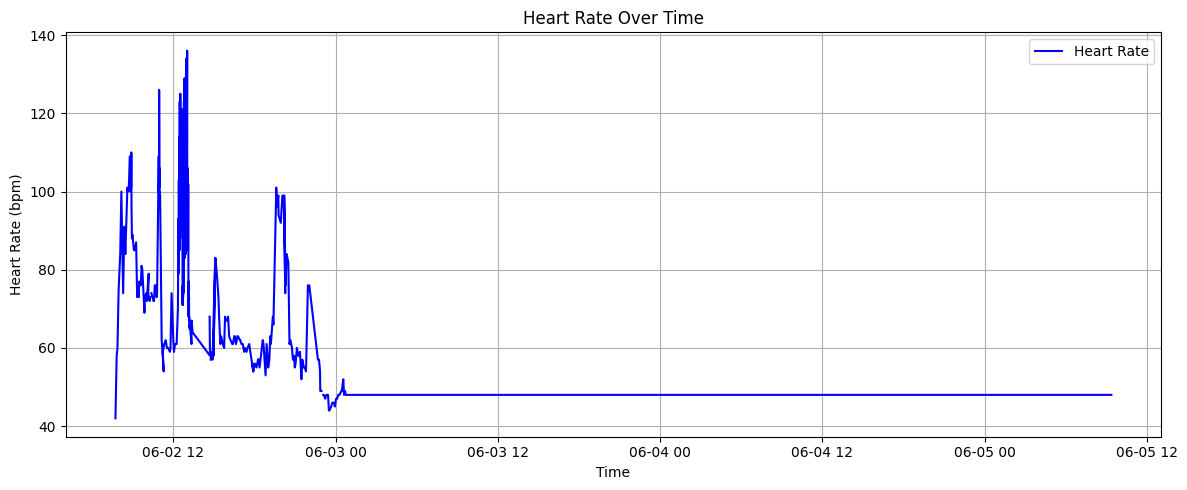

In [73]:
plt.figure(figsize=(12, 5))
plt.plot(df["Timestamp"], df["Heart rate"], label="Heart Rate", color='blue')
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.title("Heart Rate Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
df = df.set_index("Timestamp")
df = df.sort_index() 

def safe_mode(series):
    m = series.dropna().mode()
    if not m.empty:
        return m.iloc[0]  # return first mode if available
    return np.nan         # return NaN if nothing to choose from

df_10min = df.resample("10min").apply(lambda group: group.apply(safe_mode))
df_10min = df_10min.reset_index()
print(df_10min.head())

                  Timestamp  Device_type  Heart rate  Activity type  \
0 2025-06-02 07:40:00+02:00  Apple Watch        42.0            0.0   
1 2025-06-02 07:50:00+02:00  Apple Watch        60.0            0.0   
2 2025-06-02 08:00:00+02:00  Apple Watch        84.0            0.0   
3 2025-06-02 08:10:00+02:00  Apple Watch        74.0            1.0   
4 2025-06-02 08:20:00+02:00  Apple Watch        84.0            1.0   

  Sleep stage  Caffeine  
0       Awake       0.0  
1       Awake       0.0  
2       Awake       NaN  
3       Awake       NaN  
4       Awake       NaN  


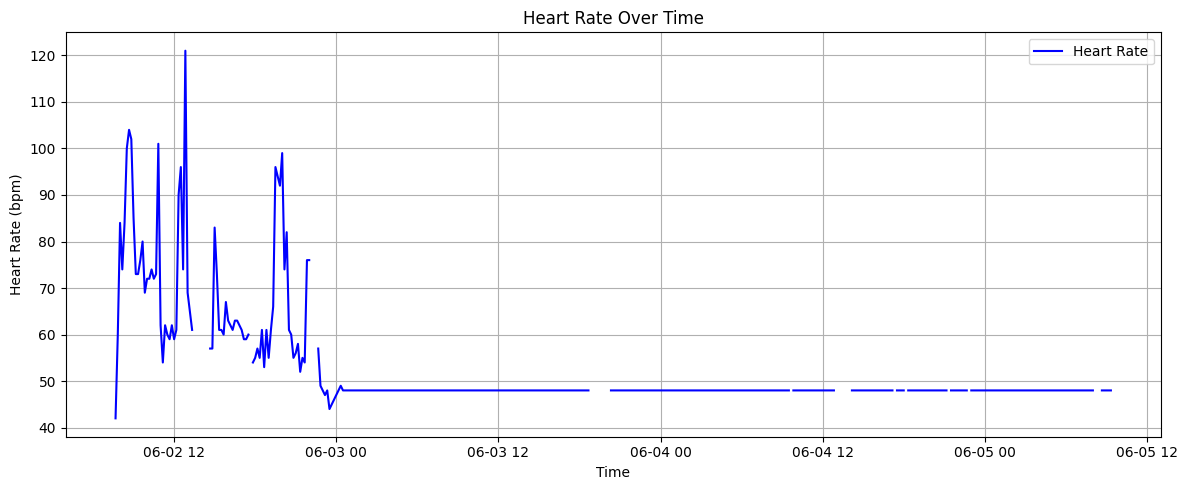

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(df_10min["Timestamp"], df_10min["Heart rate"], label="Heart Rate", color='blue')
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.title("Heart Rate Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()